# Fourth Hands-On Session
---
Understanding dispersion 

---

The following exercises might not be addressed during the course, but we encourage you to explore them after the course.
They are examples that show how one can extend our simple tools to investigate and better understand more complex systems.

## ⚛️ Physics focus: Introducing 3x3 elements

In order to consider energy effects we need to introduce at least $3\times3$ matrices for drift space, quadrupoles, and sector dipoles, where the third coordinate corresponds to the particle energy deviation $\mathrm{d}p/p_0$. Recall [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/):
 
<p align="center">
<img src=./_img_exercises/slide_3x3matrices.png width="60%">
</p>

## 🐍 Python corner

Let's import standard packages and settings. We'll be using:
- `numpy` as `np`
- `matplotlib.pyplot` as `plt`
- functions `B3`, `D3`, `Q3`, `transportParticles`, `transportSigmas`

In [3]:
# Import custom tracking functions and useful libraries
from tracking_library import *

**The 3x3 elements are already provided in our `tracking_library` toolbox:**

In [4]:
help(B3)

Help on function B3 in module tracking_library:

B3(phi, l)
    Thick sector bend with deflecting angle `phi` and length `L` (3x3 matrix to account for energy).

    Parameters
    ----------
    phi : float
        Bending angle [rad]
    l : float
        Arc length of the bend [m]

    Returns
    -------
    list of dict
        List containing a dictionary with the transfer matrix and its length.



## 📝 Exercise 4.1: Building a FODO beamline with sector bends (3x3)

Setting the scene: build a beam line of 6 FODO cells (e.g., L_cell = 4 m) with a phase advance of 60 degrees/cell (using 3x3 thin quadrupoles just introduced). 
Add a sector bending magnet (3x3 version) with length 1 m and bending angle $\phi=10$ degrees in the center of each drift. 
At this point, it is not too important where you start your FODO cell.

Verify nothing changes with respect to the same beamline made of 2x2 matrices.

> 🔹 **NOTE**: You may have to play with the quadrupole focal length to make the phase advance close to 60 degrees. You should have done this in earlier exercises. 

In [5]:
# code here your solution...

## 📝 Exercise 4.2: Effect of momentum deviation on particle trajectories

Consider the previously defined beamline (3x3 case).
Use the starting conditions $(x_0,x_0',\delta)=(0,0,0)$ and plot the position along the beam line. Repeat this for $\delta=10^{-3}$ and for $\delta=3\times 10^{-3}$. Plot all three traces in the same graph. Discuss what you observe and explain.

In [6]:
# code here your solution...

## 📝 Exercise 4.3: Periodic beam matrix & beam size without momentum spread
Work out the transverse components of the periodic beam matrix $\sigma_0$. Assume that the geometrical emittance is $\epsilon_0=10^{-6}$ m rad. Furthermore, assume that the momentum spread $\sigma_0(3,3)=\sigma_p^2$ is zero and plot the beam size along the beam line.

In [7]:
# code here your solution...

## 📝 Exercise 4.4: Influence of momentum Spread and phase Advance on beam size
Plot the beam size for for $\sigma_p^2=10^{-3}$ and for $\sigma_p^2=3\times 10^{-3}$. What happens if you change the phase advance of the cell? Try out by slightly changing the focal lengths.

In [8]:
# code here your solution...

## 📝 Exercise 4.5 (guided): Determining and plotting the periodic dispersion

Determine the periodic dispersion at the start of the cell. Then plot the dispersion in the cell.

#### SOLUTION

For that we need to find the *real* periodic solution of the 3x3 one turn matrix

In [11]:
l_cell = 4
l_dipole = 1
l_drift = (l_cell - l_dipole * 2) / 4
phi = 20 * np.pi / 360
f = 2.26085
fodo_lattice = (
        Q3(f)
        + 3 * D3(l_drift / 3)
        + B3(phi, l_dipole)
        + 3 * D3(l_drift / 3)
        + Q3(-f)
        + 3 * D3(l_drift / 3)
        + B3(phi, l_dipole)
        + 3 * D3(l_drift / 3)
)
beamline = 6 * fodo_lattice

In [12]:
OTM = getEquivalentElement(beamline)
eigenvalues, eigenvectors = np.linalg.eig(OTM[0]["matrix"])
print(eigenvalues)
print(eigenvectors[:, 2])

[1.+2.84959794e-05j 1.-2.84959794e-05j 1.+0.00000000e+00j]
[0.84331413+0.j 0.18650378+0.j 0.50402145+0.j]


Note that the third eigenvalue is real, i.e. is associated to a real eigenvector, which is our solution:

In [13]:
dispersion = np.real(eigenvectors[:, 2] / eigenvectors[2, 2])
print(dispersion)

[1.67317109 0.37003142 1.        ]


Sanity check: one can see that indeeed is a periodic solution!

In [14]:
OTM[0]["matrix"] @ dispersion

array([1.67317109, 0.37003142, 1.        ])

And track it along our lattice:

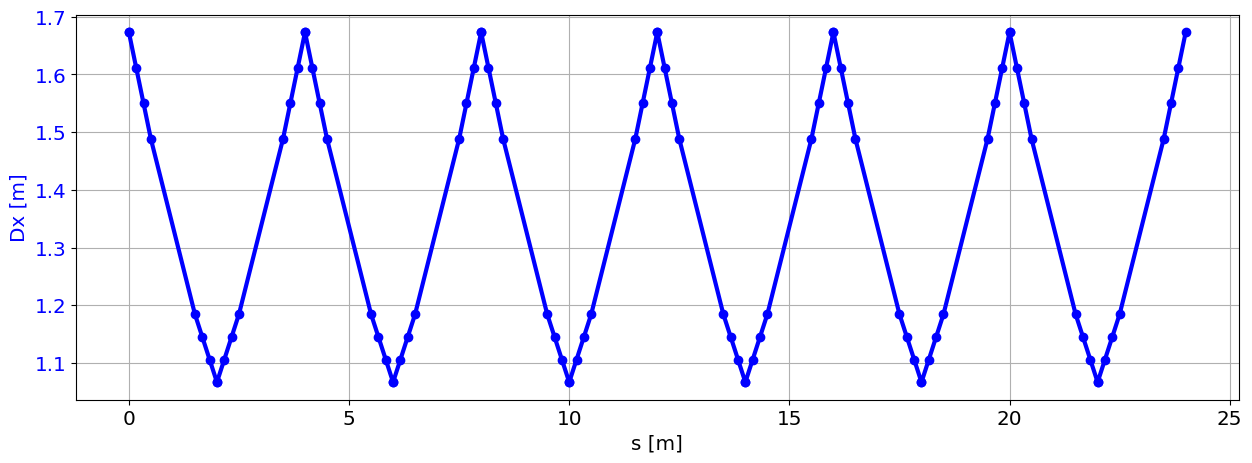

In [15]:
# need to make dispersion array compatible with our transportParticles function
dispersion = np.reshape(dispersion, (3, 1))
transported_particles = transportParticles(dispersion, beamline)

plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("Dx [m]", color="b")
plt.tick_params(axis="y", labelcolor="b")

## Well done !!

=> **If you still have time, continue your learning with the following [notebook](./05_4D_Systems.ipynb)**...